# MMLU Benchmark

> Evaluate Llama models using MMLU

# Parameters

In [1]:
n_iterations = 3
n_questions = 500
checkpoint = "Llama3.2-11B-Vision-Instruct"

# Setup

In [2]:
# Imports
import logging
from logging import StreamHandler, Formatter
import os
from pathlib import Path
from random import sample
import sys
from typing import Iterator

from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from tqdm.auto import trange, tqdm

from llama_kit.model import load_config, load_parameters, load_tokenizer, render_prompt, unpack_parameters, LlamaHead, LlamaModel, ModelConfig
from llama_kit.benchmarks.mmlu import (
    Dataset,
    load_dataset, 
    display_questions, 
    generate_prompt, 
    select_question, 
    Answer, 
    Answers, 
    Question,
    Questions, 
    OPTIONS, 
    evaluate_generator, 
    MMLUGenerator,
    filter_questions,
)

In [3]:
# Configure
datasets_path = Path(os.environ["PROJECT_ROOT"]) / ".build" / "datasets"
mmlu_dataset_path = datasets_path / "mmlu"

# Logging
handler = StreamHandler(sys.stderr)
handler.setFormatter(Formatter("%(asctime)s - %(levelname)s - %(name)s - %(message)s"))
logging.root.addHandler(handler)
logging.root.setLevel(logging.INFO)

# Dataset

In [4]:
dataset = load_dataset(mmlu_dataset_path)
print(f"Loaded {len(dataset.questions)} questions, {len(dataset.examples)} examples, {len(dataset.categories)} categories")

Loaded 14042 questions, 285 examples, 57 categories


# Generator

In [5]:
# Load checkpoint config
config = load_config(checkpoint)

# Initialize generator
generator = MMLUGenerator(config)
generator.load_state_dict(load_parameters(config))

<All keys matched successfully>

# Benchmark

In [6]:
scores = []

for _ in trange(n_iterations, desc="Iterations"):

    # Sample questions
    questions = sample(dataset.questions, k=n_questions)

    # Evaluate generator w/ 0-shot
    score = evaluate_generator(
        generator,
        questions=tqdm(questions, desc="Questions", leave=False),
        n_shots=0,
        examples=dataset.examples,
    )

    scores.append(score)

Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Questions:   0%|          | 0/500 [00:00<?, ?it/s]

Questions:   0%|          | 0/500 [00:00<?, ?it/s]

Questions:   0%|          | 0/500 [00:00<?, ?it/s]

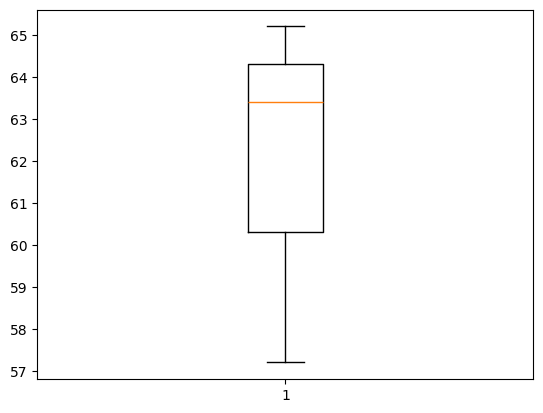

In [7]:
plt.boxplot(scores)
plt.show()